# **SUPPORT VECTOR MACHINE**

## **Task 1: Exploratory Data Analysis (EDA)**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('/content/mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [48]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [49]:
df.dtypes

,0
Unnamed: 0,int64
cap_shape,object
cap_surface,object
cap_color,object
bruises,object
odor,object
gill_attachment,object
gill_spacing,object
gill_size,object
gill_color,object


In [50]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


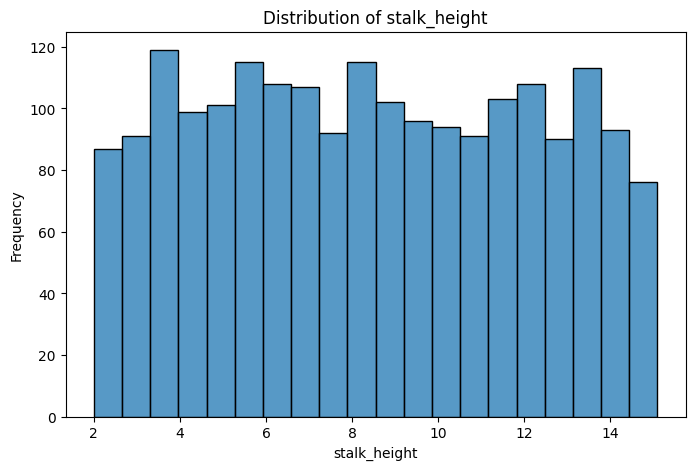

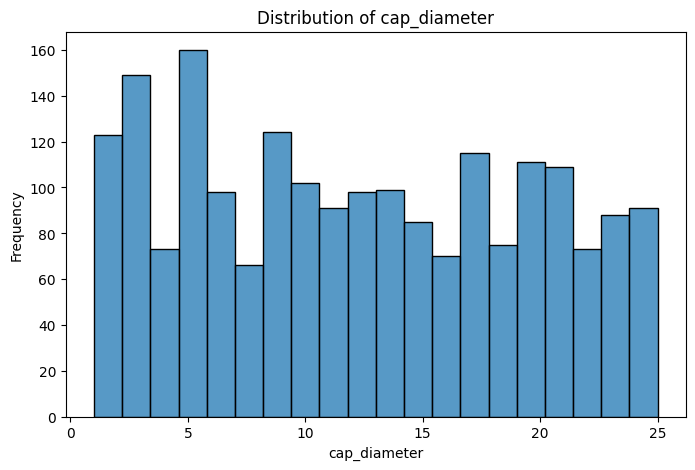

In [51]:
# For numerical columns
numerical_columns = ['stalk_height', 'cap_diameter']

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=False, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


<ipython-input-52-a84ede27b81d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


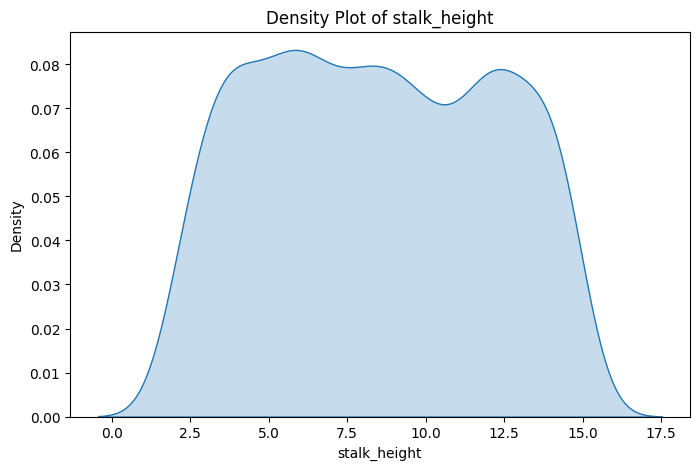

<ipython-input-52-a84ede27b81d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


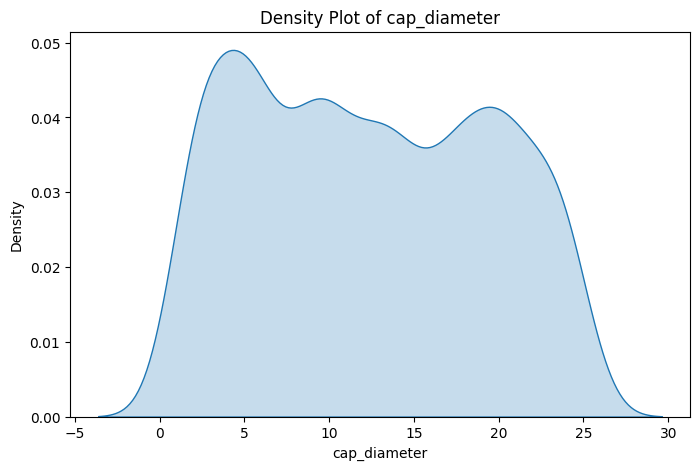

In [52]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


## **Task 2: Data Preprocessing**

In [53]:
categorical_col = df.select_dtypes(include=['object']).columns

In [54]:
df_en = pd.get_dummies(df, columns=categorical_col).astype(int)
df_en

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,...,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_edible,class_poisonous
0,1167,14,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1037,3,19,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
2,309,9,7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,282,5,20,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,820,14,12,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,5,17,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1996,1160,6,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1997,265,13,11,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1998,411,11,8,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
col = df_en.columns
col

Index(['Unnamed: 0', 'stalk_height', 'cap_diameter', 'cap_shape_bell',
       'cap_shape_conical', 'cap_shape_convex', 'cap_shape_flat',
       'cap_shape_sunken', 'cap_surface_fibrous', 'cap_surface_grooves',
       ...
       'population_solitary', 'habitat_grasses', 'habitat_leaves',
       'habitat_meadows', 'habitat_paths', 'habitat_urban', 'habitat_waste',
       'habitat_woods', 'class_edible', 'class_poisonous'],
      dtype='object', length=129)

In [57]:
# Defining features and target columns
X = df_en.drop('class_poisonous', axis=1)  # Features
y = df_en['class_poisonous']               # Target

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (1600, 128) (1600,)
Testing set size: (400, 128) (400,)


## **Task 3: Data Visualization**

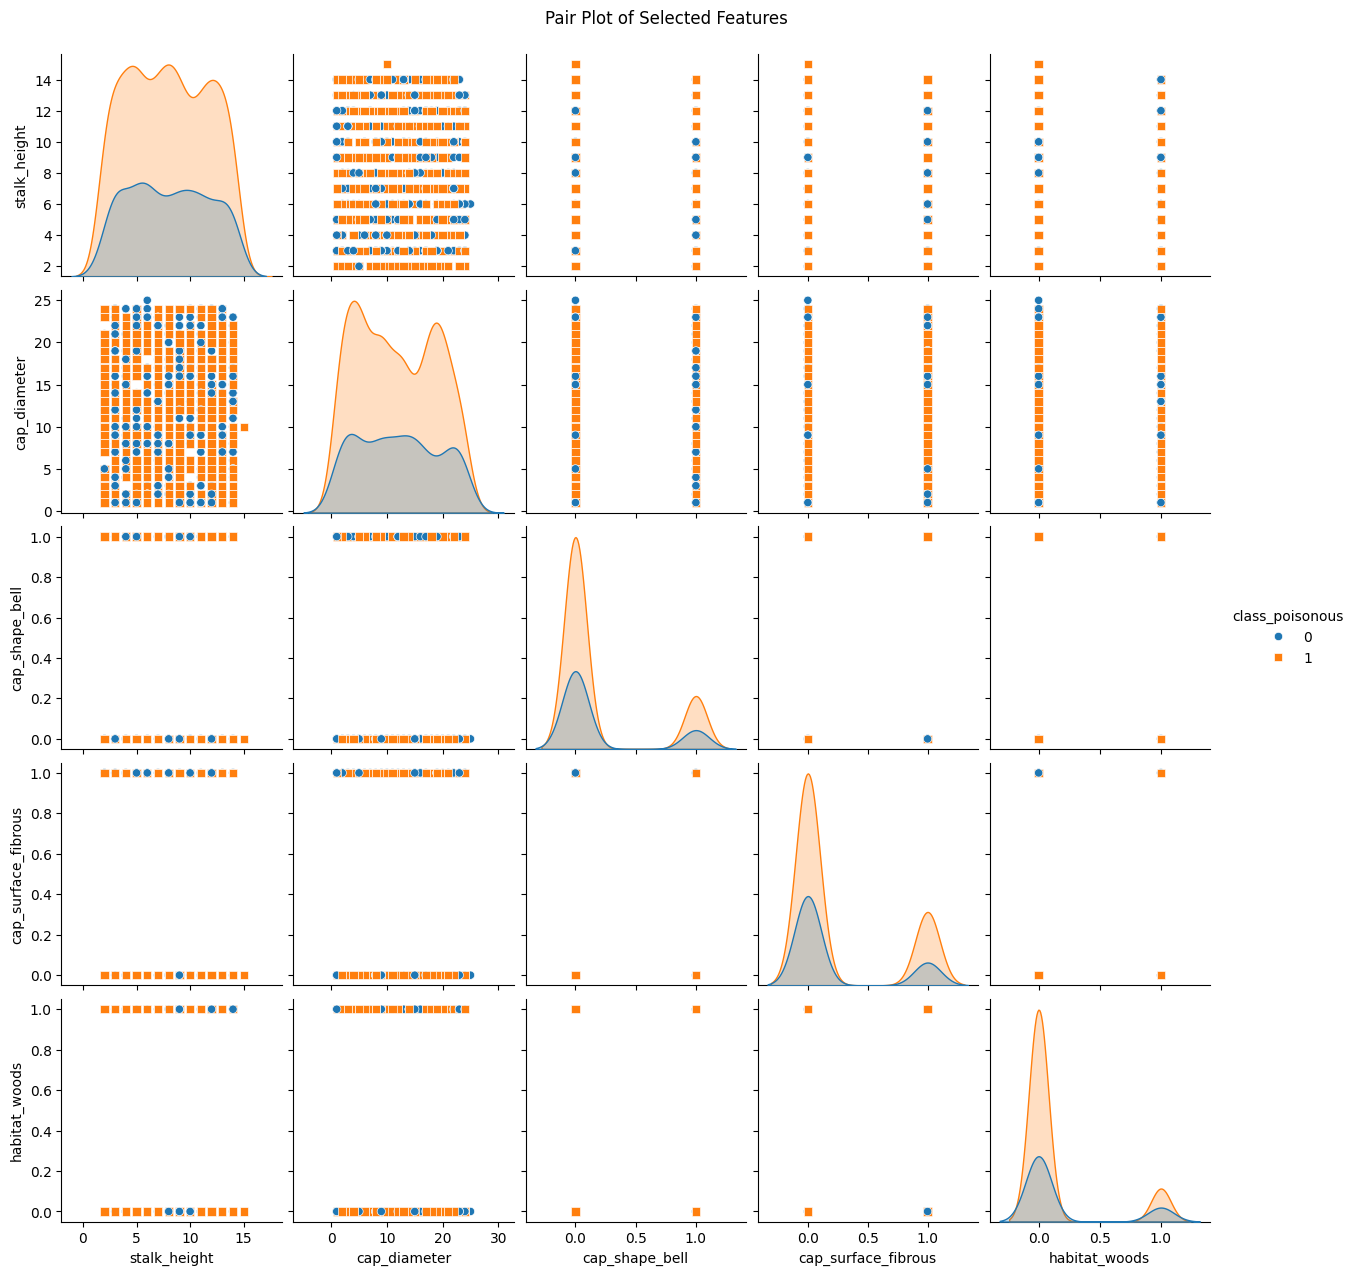

In [60]:
# Create a DataFrame with the selected features
selected_features = ['stalk_height', 'cap_diameter', 'cap_shape_bell', 'cap_surface_fibrous', 'habitat_woods', 'class_poisonous']
df_subset = df_en[selected_features]

# Pair plot for the subset of features
sns.pairplot(df_subset, hue='class_poisonous', diag_kind='kde', markers=['o', 's'])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

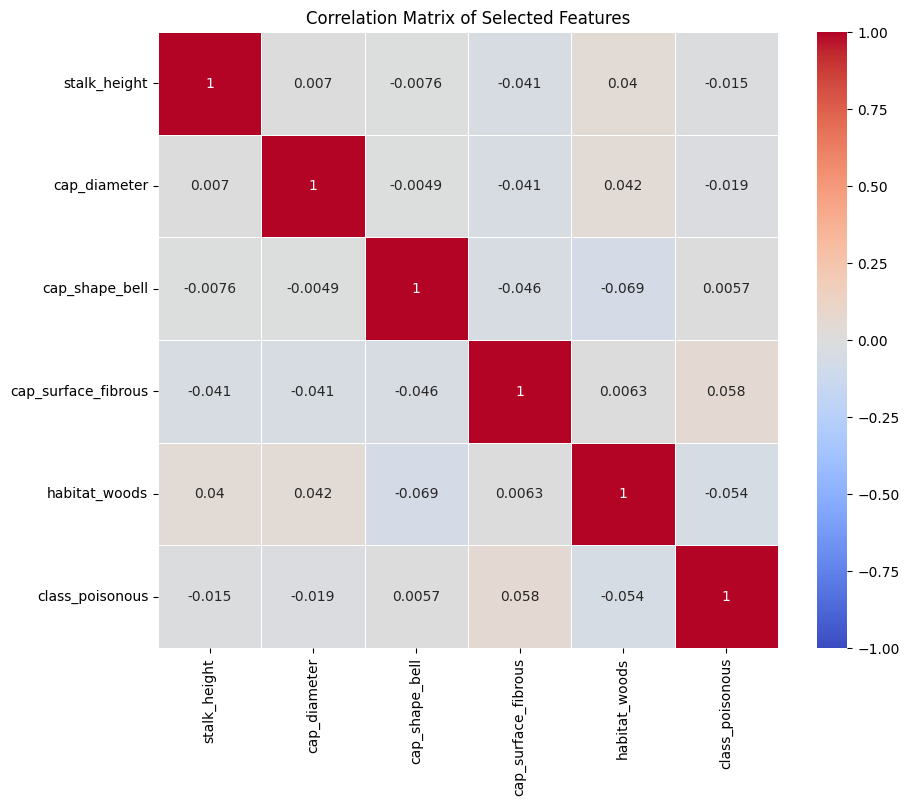

In [61]:
# Calculate the correlation matrix for the selected features
corr_matrix = df_subset.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()

<ipython-input-62-ef949fc85a8c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class_poisonous', data=df_en, palette='viridis')


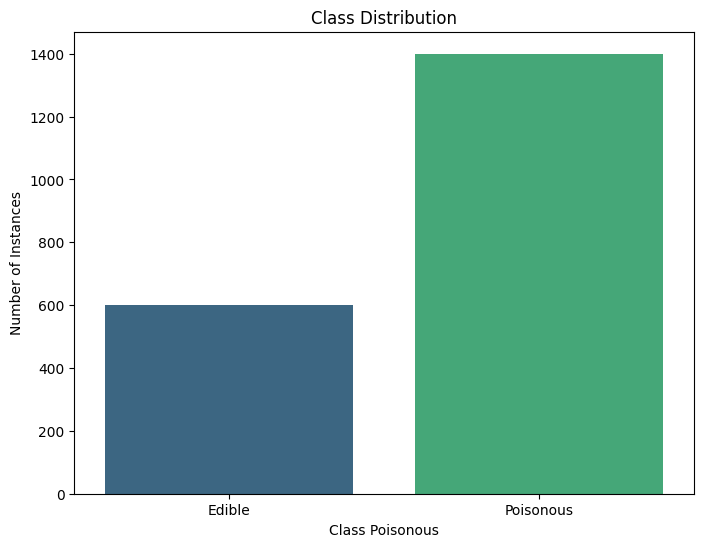

In [62]:
# Count plot to visualize class distribution
# Count Plot: Shows the number of instances for each class.
plt.figure(figsize=(8, 6))
sns.countplot(x='class_poisonous', data=df_en, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class Poisonous')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.show()

In [63]:
# Calculate and print the class distribution
class_counts = df_en['class_poisonous'].value_counts()
class_proportions = df_en['class_poisonous'].value_counts(normalize=True)

print("Class Counts:\n", class_counts)
print("\nClass Proportions:\n", class_proportions)

Class Counts:
 class_poisonous
1    1400
0     600
Name: count, dtype: int64

Class Proportions:
 class_poisonous
1    0.7
0    0.3
Name: proportion, dtype: float64


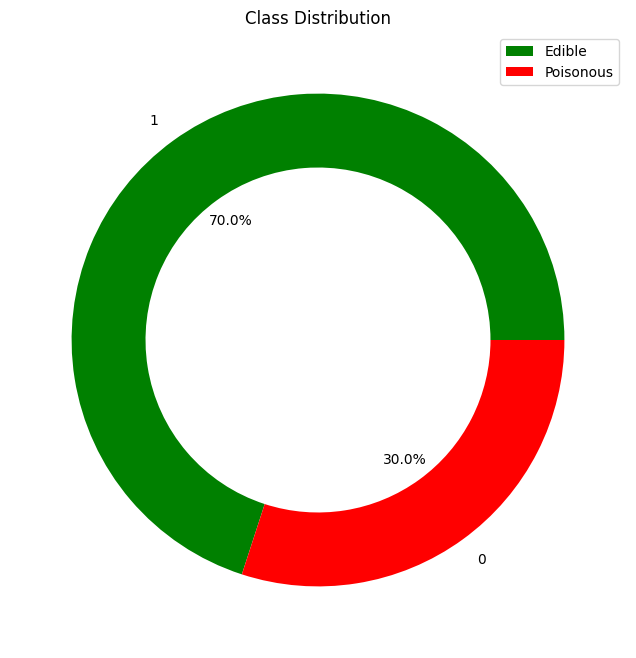

In [64]:
import matplotlib.pyplot as plt

# Define the colors for the pie chart
# Ensure the order matches the class values in the DataFrame
colors = ['green', 'red']  # Blue for Edible, Orange for Poisonous

# Pie chart to visualize class distribution
plt.figure(figsize=(8, 8))
df_en['class_poisonous'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops=dict(width=0.3)  # Optional: adjusts the width of the pie slices
)
plt.title('Class Distribution')
plt.ylabel('')  # Remove the default ylabel

# Add legend
plt.legend(labels=['Edible', 'Poisonous'], loc='best')

plt.show()


## **Task 4: SVM Implementation**

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Define features and target
#X = df_en.drop('class_poisonous', axis=1)
#y = df_en['class_poisonous']

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Initialize the SVM classifier
svm_clf = SVC(kernel='linear')  # You can use different kernels like 'rbf' or 'poly'

# Train the classifier
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [68]:
# Make predictions
y_pred = svm_clf.predict(X_test)

In [69]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [70]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       267

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



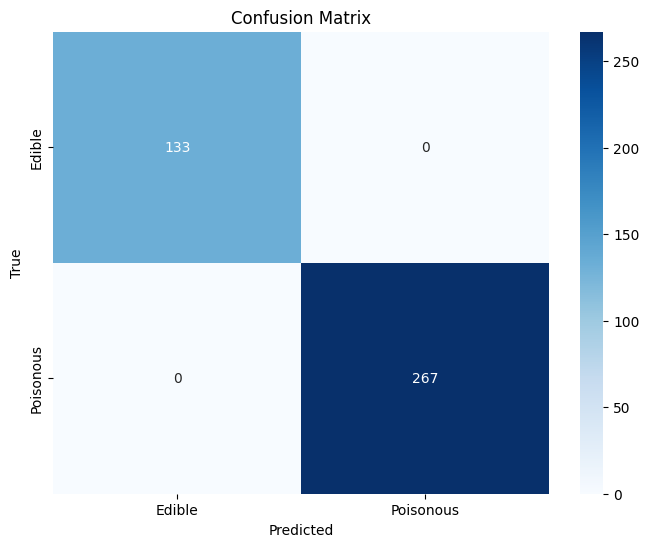

In [71]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## **Task 5: Visualization of SVM Results**

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot decision boundaries
def plot_decision_boundary(X, y, model):
    # Create a mesh grid for plotting
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

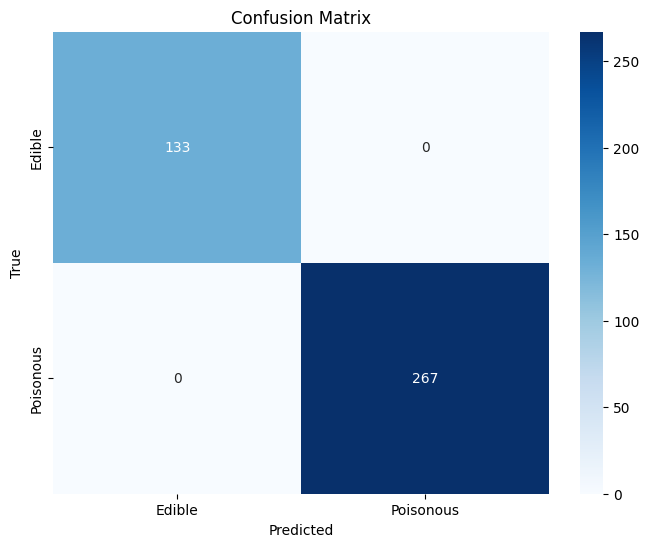

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


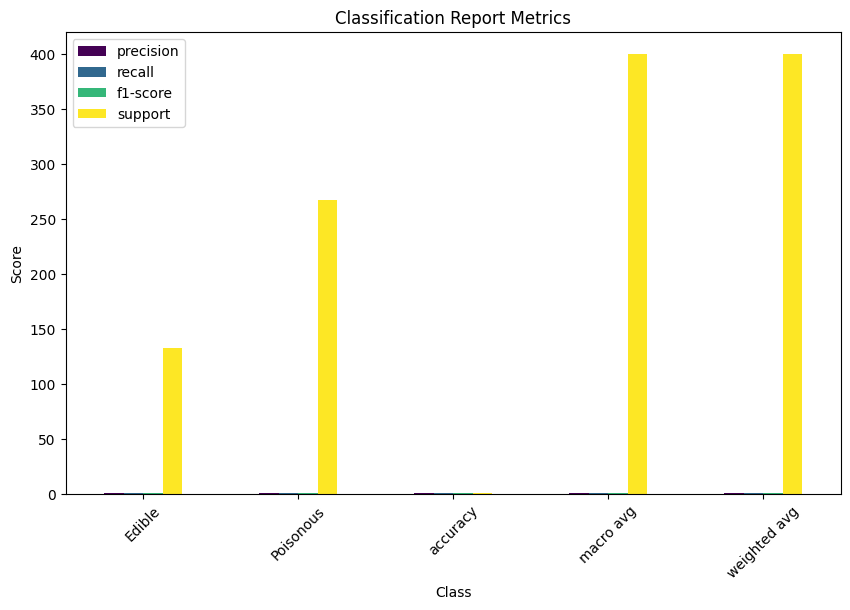

In [74]:
from sklearn.metrics import classification_report
import pandas as pd

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting the classification report
report_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Classification Report Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()


## **Task 6: Parameter Tuning and Optimization**

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [76]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'
}

In [77]:
# Initialize the SVM model
svm = SVC()

In [78]:
# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [79]:
# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [80]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 1.0


In [81]:
# Get the best model from grid search
best_svm = grid_search.best_estimator_

In [82]:
# Evaluate on the test data
y_pred_best = best_svm.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Optimized Accuracy: {accuracy_best:.2f}')

Optimized Accuracy: 1.00



Optimized Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       133
   Poisonous       1.00      1.00      1.00       267

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



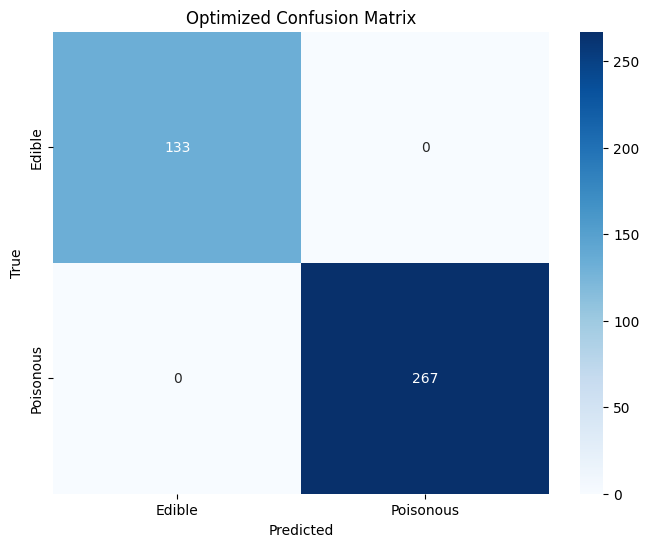

In [84]:
# Classification Report
print('\nOptimized Classification Report:')
print(classification_report(y_test, y_pred_best, target_names=['Edible', 'Poisonous']))

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Optimized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## **Task 7: Comparison and Analysis**

In [85]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [86]:
# Define different SVM models with various kernels
kernels = ['linear', 'poly', 'rbf']
results = {}

In [87]:
for kernel in kernels:
    svm_clf = SVC(kernel=kernel, C=0.1, gamma='scale')
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous'])

    # Storing results
    results[kernel] = {'Accuracy': accuracy, 'Report': report}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [88]:
# Display results
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print("Classification Report:")
    print(metrics['Report'])
    print("\n" + "="*40 + "\n")

Kernel: linear
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       133
   Poisonous       1.00      1.00      1.00       267

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



Kernel: poly
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       133
   Poisonous       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



Kernel: rbf
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       133
   Poisonous       0.67      1.00      0.80       267

    accuracy            

### **Strengths:**

1.   **Effective in High-Dimensional Spaces:**   
SVM performs well even with a large number of features, which is beneficial for your mushroom dataset that has many encoded columns.
2.   **Robustness to Outliers:**   
SVM is less affected by outliers because it focuses on the support vectors (the critical points near the decision boundary).
3.   **Versatility with Kernels:**
SVM can use different kernels (linear, polynomial, RBF) to adapt to the data's underlying patterns, making it flexible for datasets with complex feature interactions.
4.   **Handles Binary Classification Well:**
Since the mushroom dataset involves classifying between two classes (poisonous and edible), SVM is well-suited for this type of binary classification task.

### **Weaknesses:**

1.   **Computational Complexity:**   
With a large number of features and data points, SVM can become computationally expensive, both in terms of training time and memory usage.
2.   **Sensitivity to Feature Scaling:**   
SVMs require features to be scaled appropriately. If the features in your dataset are not scaled, the model’s performance might degrade.
3.   **Difficulty with Imbalanced Datasets:**
If the mushroom dataset is imbalanced (one class is significantly more frequent than the other), SVM might not perform as well, as it tends to favor the majority class.
4.   **Black-Box Nature:**
The decision boundary formed by SVM, especially with non-linear kernels, can be hard to interpret, making it difficult to understand how the model is making decisions.

### **Practical Implications of SVM in Day-to-Day Applications**

1.   **Email Spam Detection:**
Application: Companies can use SVM to classify incoming emails as "spam" or "not spam." By training on a dataset of labeled emails, the SVM model can learn to distinguish between spam and legitimate emails, improving the efficiency of email management and reducing the risk of phishing attacks.

2.   **Customer Churn Prediction:**
Application: In industries like telecommunications or subscription-based services, SVM can be used to predict customer churn. By analyzing patterns in customer behavior and service usage, SVM can help identify customers who are likely to leave, enabling companies to take proactive measures to retain them.

3.   **Quality Control in Manufacturing:**
Application: SVM can be used in quality control processes to classify products as "defective" or "non-defective" based on features like size, weight, or material composition. This helps in maintaining product quality standards and reducing the likelihood of defective products reaching customers.
